In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot 
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')

In [8]:
df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\data_p.csv', sep=',')
print(df.shape)
df.head()

(12652, 25)


,id,Country,Year,region,protest,protesterviolence,protesterdemand1,protesterdemand2,protesterdemand3,protesterdemand4,...,stateresponse6,stateresponse7,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
0,201990001,Canada,1990,North America,1,0,"political behavior, process",labor wage dispute,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
1,201990002,Canada,1990,North America,1,0,"political behavior, process",NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
2,201990003,Canada,1990,North America,1,0,"political behavior, process",NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
3,201990004,Canada,1990,North America,1,1,land farm issue,NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385
4,201990005,Canada,1990,North America,1,1,"political behavior, process",NaN,NaN,NaN,...,NaN,NaN,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385


In [9]:
df.isnull().sum()

id                         0
Country                    0
Year                       0
region                     0
protest                    0
protesterviolence          0
protesterdemand1           1
protesterdemand2       10091
protesterdemand3       12317
protesterdemand4       12011
stateresponse1            23
stateresponse2         10280
stateresponse3         11896
stateresponse4         12453
stateresponse5         11995
stateresponse6         12639
stateresponse7         11893
Electoral_Score            0
Liberal_Score              0
Participatory_Score        0
Deliberative_Score         0
Egalitarian_Score          0
HDI_Score                216
violenceStatus             0
predicted_prob           216
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   12652 non-null  int64  
 1   Country              12652 non-null  object 
 2   Year                 12652 non-null  int64  
 3   region               12652 non-null  object 
 4   protest              12652 non-null  int64  
 5   protesterviolence    12652 non-null  int64  
 6   protesterdemand1     12651 non-null  object 
 7   protesterdemand2     2561 non-null   object 
 8   protesterdemand3     335 non-null    object 
 9   protesterdemand4     641 non-null    object 
 10  stateresponse1       12629 non-null  object 
 11  stateresponse2       2372 non-null   object 
 12  stateresponse3       756 non-null    object 
 13  stateresponse4       199 non-null    object 
 14  stateresponse5       657 non-null    object 
 15  stateresponse6       13 non-null    

In [11]:
df.describe()

,id,Year,protest,protesterviolence,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
count,1.265200e+04,12652.000000,12652.0,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000,12652.000000,12436.000000,12652.000000,12436.000000
mean,4.263609e+09,2006.626620,1.0,0.263990,0.566069,0.446735,0.370286,0.455604,0.420957,0.679471,0.440642,0.439530
std,2.363909e+09,8.812148,0.0,0.440811,0.251981,0.269327,0.201592,0.251682,0.246582,0.161842,0.496484,0.125796
min,2.019900e+08,1990.000000,1.0,0.000000,0.014000,0.006000,0.009000,0.006000,0.034000,0.197000,0.000000,0.237938
25%,2.052018e+09,1999.000000,1.0,0.000000,0.352000,0.211000,0.203000,0.241000,0.213000,0.558000,0.000000,0.309645
50%,3.732010e+09,2008.000000,1.0,0.000000,0.549000,0.403000,0.346000,0.415000,0.331000,0.694000,0.000000,0.455389
75%,6.452011e+09,2014.000000,1.0,1.000000,0.843000,0.755000,0.582000,0.727000,0.680000,0.807000,1.000000,0.539201
max,9.102017e+09,2019.000000,1.0,1.000000,0.922000,0.896000,0.807000,0.886000,0.885000,0.955000,1.000000,0.775399


In [12]:
df = df.drop(['id', 'protest', 'protesterdemand2', 'protesterdemand3',
         'protesterdemand4', 'stateresponse2', 'stateresponse3',
         'stateresponse4', 'stateresponse5', 'stateresponse6',
         'stateresponse7'], 
        axis=1)

In [13]:
df.isnull().sum()

Country                  0
Year                     0
region                   0
protesterviolence        0
protesterdemand1         1
stateresponse1          23
Electoral_Score          0
Liberal_Score            0
Participatory_Score      0
Deliberative_Score       0
Egalitarian_Score        0
HDI_Score              216
violenceStatus           0
predicted_prob         216
dtype: int64

In [14]:
df.head()

,Country,Year,region,protesterviolence,protesterdemand1,stateresponse1,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
0,Canada,1990,North America,0,"political behavior, process",ignore,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
1,Canada,1990,North America,0,"political behavior, process",ignore,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
2,Canada,1990,North America,0,"political behavior, process",ignore,0.834,0.759,0.58,0.756,0.719,0.85,0,0.299385
3,Canada,1990,North America,1,land farm issue,accomodation,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385
4,Canada,1990,North America,1,"political behavior, process",crowd dispersal,0.834,0.759,0.58,0.756,0.719,0.85,1,0.299385


In [15]:
cnt_country = df['Country'].value_counts().reset_index()
cnt_country = cnt_country[cnt_country['count'] >= 50]

fig = px.bar(data_frame=cnt_country, x='Country', y='count')

fig.show(renderer='iframe_connected')

In [16]:
df = df[df['Country'].isin(cnt_country['Country'])]
df

,Country,Year,region,protesterviolence,protesterdemand1,stateresponse1,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
0,Canada,1990,North America,0,"political behavior, process",ignore,0.834,0.759,0.580,0.756,0.719,0.850,0,0.299385
1,Canada,1990,North America,0,"political behavior, process",ignore,0.834,0.759,0.580,0.756,0.719,0.850,0,0.299385
2,Canada,1990,North America,0,"political behavior, process",ignore,0.834,0.759,0.580,0.756,0.719,0.850,0,0.299385
3,Canada,1990,North America,1,land farm issue,accomodation,0.834,0.759,0.580,0.756,0.719,0.850,1,0.299385
4,Canada,1990,North America,1,"political behavior, process",crowd dispersal,0.834,0.759,0.580,0.756,0.719,0.850,1,0.299385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12609,Indonesia,2019,Asia,1,"political behavior, process",killings,0.601,0.462,0.398,0.516,0.359,0.718,1,0.423313
12610,Indonesia,2019,Asia,1,police brutality,ignore,0.601,0.462,0.398,0.516,0.359,0.718,1,0.423313
12611,Indonesia,2019,Asia,1,"political behavior, process",killings,0.601,0.462,0.398,0.516,0.359,0.718,1,0.423313
12612,Indonesia,2019,Asia,0,"political behavior, process",crowd dispersal,0.601,0.462,0.398,0.516,0.359,0.718,1,0.423313


In [17]:
gr = df.groupby(['Country', 'Year'])['Country'].size().reset_index(name='Count')
gr

,Country,Year,Count
0,Albania,1990,5
1,Albania,1991,8
2,Albania,1992,3
3,Albania,1993,2
4,Albania,1994,1
...,...,...,...
1890,Zimbabwe,2015,3
1891,Zimbabwe,2016,17
1892,Zimbabwe,2017,5
1893,Zimbabwe,2018,5


In [18]:
fig = px.bar(gr, x='Country', y='Count', color='Country',
             animation_frame='Year',
             range_y=[0, gr['Count'].max() + 5],
             template='ggplot2')
fig.update_layout(width=1200, height=800)
fig.show(renderer='iframe_connected')

In [19]:
mean_in_country = gr.groupby('Country')['Count'].mean().reset_index()
mean_in_country

,Country,Count
0,Albania,5.133333
1,Algeria,7.500000
2,Argentina,4.222222
3,Armenia,3.851852
4,Azerbaijan,5.434783
...,...,...
76,United Kingdom,19.133333
77,Uruguay,3.090909
78,Yemen,7.136364
79,Zambia,3.518519


In [20]:
fig = px.bar(data_frame=mean_in_country, x='Country', y='Count')
fig.show(renderer='iframe_connected')

In [21]:
gr = df.groupby('region')['region'].size().reset_index(name='count')
gr

,region,count
0,Africa,2430
1,Asia,2357
2,Central America,365
3,Europe,3888
4,MENA,696
5,North America,492
6,South America,1161


In [22]:
fig = px.pie(gr, values='count', names='region', title='Region Protests Distribution')
fig.show(renderer='iframe_connected')

In [23]:
df_Europe = df[df['region'] == 'Europe'].drop('region', axis=1)
df_Africa = df[df['region'] == 'Africa'].drop('region', axis=1)
df_Asia = df[df['region'] == 'Asia'].drop('region', axis=1)
df_North_America = df[df['region'] == 'North America'].drop('region', axis=1)
df_South_America = df[df['region'] == 'South America'].drop('region', axis=1)
df_Central_America = df[df['region'] == 'Central America'].drop('region', axis=1)
df_MENA = df[df['region'] == 'MENA'].drop('region', axis=1)

In [24]:
df_Europe.head()

,Country,Year,protesterviolence,protesterdemand1,stateresponse1,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
2167,United Kingdom,1990,0,labor wage dispute,ignore,0.817,0.745,0.573,0.695,0.673,0.781,0,0.315732
2168,United Kingdom,1990,0,"price increases, tax policy",ignore,0.817,0.745,0.573,0.695,0.673,0.781,0,0.315732
2169,United Kingdom,1990,0,"political behavior, process",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732
2170,United Kingdom,1990,0,"price increases, tax policy",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732
2171,United Kingdom,1990,0,"price increases, tax policy",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732


In [25]:
df_Europe['protesterdemand1'].value_counts()

protesterdemand1
political behavior, process    2536
labor wage dispute              509
price increases, tax policy     321
removal of politician           174
land farm issue                 117
social restrictions             116
police brutality                115
Name: count, dtype: int64

In [26]:
df_Europe['stateresponse1'].value_counts()

stateresponse1
ignore             2577
crowd dispersal     871
arrests             192
accomodation        190
beatings             39
shootings            13
killings              3
Name: count, dtype: int64

In [27]:
fig = px.box(df_Europe, x='Country', y='Year', color='protesterviolence')
fig.show(renderer='iframe_connected')

In [28]:
gr = df_Europe.groupby(['Country', 'Year'])['Country'].size().reset_index(name='cnt')
gr

,Country,Year,cnt
0,Albania,1990,5
1,Albania,1991,8
2,Albania,1992,3
3,Albania,1993,2
4,Albania,1994,1
...,...,...,...
457,United Kingdom,2015,20
458,United Kingdom,2016,35
459,United Kingdom,2017,21
460,United Kingdom,2018,24


In [29]:
fig = px.line(gr, x='Year', y='cnt', animation_frame='Country', template='ggplot2')

y_min = gr['cnt'].min() - 1  
y_max = gr['cnt'].max() + 1 
x_min = gr['Year'].min()
x_max = gr['Year'].max() + 1

fig.update_yaxes(range=[y_min, y_max], title_text='Count', title_font=dict(size=14), gridcolor='LightGray')
fig.update_xaxes(range=[x_min, x_max], title_text='Year', title_font=dict(size=14), gridcolor='LightGray')
fig.update_layout(
    title_x=0.5,  
    width=1200,
    height=900,
    legend_title_text='Countries',
    hovermode='x unified'
)

fig.show(renderer='iframe_connected')

In [30]:
df.columns

Index(['Country', 'Year', 'region', 'protesterviolence', 'protesterdemand1',
       'stateresponse1', 'Electoral_Score', 'Liberal_Score',
       'Participatory_Score', 'Deliberative_Score', 'Egalitarian_Score',
       'HDI_Score', 'violenceStatus', 'predicted_prob'],
      dtype='object')

In [31]:
fig = px.scatter_3d(data_frame=df_Europe, x='Electoral_Score', y='Deliberative_Score', z='HDI_Score',
                    color='Country', animation_frame='Year')
fig.show(renderer='iframe_connected')

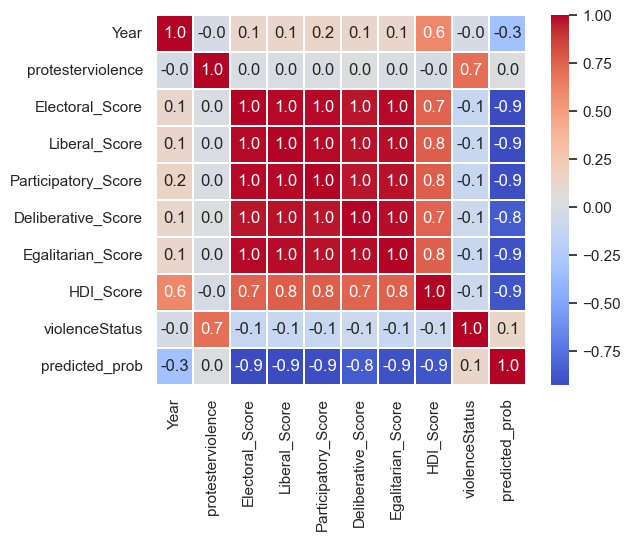

In [32]:
numeric_df = df_Europe.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

In [33]:
vl_cnt = df_Europe.groupby(['Country',
                            'protesterviolence', 'protesterdemand1', 
                            'stateresponse1'])['protesterdemand1'].size().reset_index(name='cnt')
vl_cnt

,Country,protesterviolence,protesterdemand1,stateresponse1,cnt
0,Albania,0,labor wage dispute,ignore,2
1,Albania,0,land farm issue,crowd dispersal,1
2,Albania,0,"political behavior, process",beatings,5
3,Albania,0,"political behavior, process",crowd dispersal,2
4,Albania,0,"political behavior, process",ignore,21
...,...,...,...,...,...
414,United Kingdom,1,"political behavior, process",beatings,3
415,United Kingdom,1,"political behavior, process",crowd dispersal,56
416,United Kingdom,1,"political behavior, process",ignore,6
417,United Kingdom,1,"price increases, tax policy",arrests,1


In [34]:
fig = px.pie(vl_cnt, names='protesterdemand1', values='cnt', template='ggplot2')
fig.show(renderer='iframe_connected')

In [35]:
fig = px.bar(vl_cnt, x='protesterdemand1', y='cnt', color='protesterviolence', animation_frame='Country', template='ggplot2')
fig.show(renderer='iframe_connected')

In [36]:
vl_cnt = df_Europe.groupby(['Year',
                            'protesterviolence', 'protesterdemand1', 
                            'stateresponse1'])['protesterdemand1'].size().reset_index(name='cnt')

fig = px.bar(vl_cnt, x='protesterdemand1', y='cnt', color='protesterviolence', animation_frame='Year', template='ggplot2')
fig.show(renderer='iframe_connected')

In [37]:
vl_cnt = df_Europe.groupby(['Year', 'Country',
                            'protesterviolence', 'protesterdemand1', 
                            'stateresponse1'])['protesterdemand1'].size().reset_index(name='cnt')

fig = px.scatter_3d(vl_cnt, x='protesterdemand1', y='Year', z='stateresponse1', 
                    color='protesterviolence', animation_frame='Country', template='ggplot2')
fig.show(renderer='iframe_connected')

In [38]:
df_Europe.head()

,Country,Year,protesterviolence,protesterdemand1,stateresponse1,Electoral_Score,Liberal_Score,Participatory_Score,Deliberative_Score,Egalitarian_Score,HDI_Score,violenceStatus,predicted_prob
2167,United Kingdom,1990,0,labor wage dispute,ignore,0.817,0.745,0.573,0.695,0.673,0.781,0,0.315732
2168,United Kingdom,1990,0,"price increases, tax policy",ignore,0.817,0.745,0.573,0.695,0.673,0.781,0,0.315732
2169,United Kingdom,1990,0,"political behavior, process",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732
2170,United Kingdom,1990,0,"price increases, tax policy",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732
2171,United Kingdom,1990,0,"price increases, tax policy",crowd dispersal,0.817,0.745,0.573,0.695,0.673,0.781,1,0.315732


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd


X = df_Europe.drop(columns=["violenceStatus"])
y = df_Europe["violenceStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ["protesterviolence", "protesterdemand1", "stateresponse1"]
numerical_features = ["Electoral_Score", "Liberal_Score", "Participatory_Score", 
                      "Deliberative_Score", "Egalitarian_Score", "HDI_Score"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

models = {
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0)
}

for model_name, model in models.items():
    print(f"\n--- Model: {model_name} ---")
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    print(f"F1-Score on test data for {model_name}: {f1_score(y_test, y_pred):.2f}")
    print(f"Accuracy on test data for {model_name}: {accuracy_score(y_test, y_pred):.2f}")


--- Model: RandomForest ---
F1-Score on test data for RandomForest: 0.99
Accuracy on test data for RandomForest: 0.99

--- Model: XGBoost ---
F1-Score on test data for XGBoost: 0.99
Accuracy on test data for XGBoost: 0.99

--- Model: CatBoost ---
F1-Score on test data for CatBoost: 0.99
Accuracy on test data for CatBoost: 0.99
